Даны данные по группе людей - возраст, пол, вес, рост, давление, сахар и пр.)

Нужно спрогнозировать, заболеет ли человек сосудистыми заболеваниями.

Необходимо построить модель с предельно большим значением *ROC_AUC*. 

Источник данных: https://www.kaggle.com/competitions/yap15-heart-diseases-predictions

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as numpy

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline


from catboost.utils import create_cd
import os
import catboost
from catboost import * 


In [2]:
#create dataframe - train and test

train = pd.read_csv('C:/Users/angel/train.csv')

test = pd.read_csv('C:/Users/angel/test.csv')

In [3]:
display(train.head())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:

print(train.info())

display(train.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Описание

Фичи:
Возраст - показатель указан не в годах (вероятнее в днях) - количественный показатель
Пол - категориальный признак
Рост - количественный
Вес - количественный
Максимальное давление - количественный (присутствуют отрицательные значения)
Минимальное давление - количественный (присутствуют отрицательные значения)
Холистерин - категориальный признак
Размер глюкозы в крови - также категориальный
Курение, употребление алкоголя, занятия спортом - категориальные

Целевой признак - кардио - болеет ли человек сосудистыми заболеваниями.


In [5]:

print(test.info())

display(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB
None


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,50062.686900,19455.528400,1.353733,164.322267,74.120615,130.271300,95.689000,1.368033,1.222700,0.08860,0.055000,0.805733
std,28906.167148,2477.840922,0.478136,8.213740,14.341540,212.501152,163.852598,0.679166,0.566494,0.28417,0.227984,0.395642
min,5.000000,8865.000000,1.000000,50.000000,10.000000,-130.000000,-90.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,24983.250000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
50%,49995.500000,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
75%,75232.250000,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.00000,0.000000,1.000000
max,99997.000000,23705.000000,2.000000,198.000000,183.000000,16020.000000,9100.000000,3.000000,3.000000,1.00000,1.000000,1.000000


In [6]:
#проведем EDA сначала для трейна и для теста
#Создадим функцию для анализа пустых значений. Запустим их и проанализируем на каждом датасете. 
#Также проанализируем наличие дубликатов.

train_columns = list(train.columns.values)
test_columns = list(test.columns.values)

count = 0
error = []
def isna_data(data,columns):
    global count
    for i in range(len(columns)):
        if data[data[columns[i]].isna()][columns[i]].count() != 0.00:
            error.append('В столбце',columns[i],'количество пустых значение равно доле:',
                        data[data[columns[i]].isna()][columns[i]].count()/data[columns[i]].count())
        else: count+=1
        
    if count!=0:
        print('В датафрейме нет пустых значений')
    else: print(error)


In [7]:
#проанализируем наличие пустых значений в датасетах

isna_data(train,train_columns)
isna_data(test,test_columns)

В датафрейме нет пустых значений
В датафрейме нет пустых значений


In [8]:
display(train[train.duplicated()])

display(test[test.duplicated()])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active


In [9]:
#исследуем поле возраст

display((train['age']/365).describe())
display((test['age']/365).describe())

count    70000.000000
mean        53.339358
std          6.759594
min         29.583562
25%         48.394521
50%         53.980822
75%         58.430137
max         64.967123
Name: age, dtype: float64

count    30000.000000
mean        53.302818
std          6.788605
min         24.287671
25%         48.378082
50%         53.956164
75%         58.410959
max         64.945205
Name: age, dtype: float64

In [10]:
#исследуем корреляции количественных признаков

cat_train = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
num_train = list(train.drop(cat_train,axis=1).columns)


cat_test = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
num_test = list(test.drop(cat_test,axis=1).columns)

In [11]:
train[num_train].corr()

,id,age,height,weight,ap_hi,ap_lo
id,1.000000,0.003457,-0.003038,-0.001830,0.003356,-0.002529
age,0.003457,1.000000,-0.081515,0.053684,0.020764,0.017647
height,-0.003038,-0.081515,1.000000,0.290968,0.005488,0.006150
weight,-0.001830,0.053684,0.290968,1.000000,0.030702,0.043710
ap_hi,0.003356,0.020764,0.005488,0.030702,1.000000,0.016086
ap_lo,-0.002529,0.017647,0.006150,0.043710,0.016086,1.000000


In [12]:
test[num_test].corr()

,id,age,height,weight,ap_hi,ap_lo
id,1.000000,0.001446,0.001221,-0.002863,-0.006252,0.002854
age,0.001446,1.000000,-0.081302,0.068513,0.025133,0.026915
height,0.001221,-0.081302,1.000000,0.298785,0.002116,-0.000768
weight,-0.002863,0.068513,0.298785,1.000000,0.014420,0.047571
ap_hi,-0.006252,0.025133,0.002116,0.014420,1.000000,0.012482
ap_lo,0.002854,0.026915,-0.000768,0.047571,0.012482,1.000000


Сильных взаимосвязей в трейне не обнаружено. Обнаружена слабая обратная взаимосвязь между ростом и возрастом и прямая связь между ростом и весом (что логично), но при этом она не значимая (всегда присутствует ожирение, которое также приводит к сосудистым заболеваниям, и наоборот, дистрофия)
В тесте корреляции количественных фич схожи.

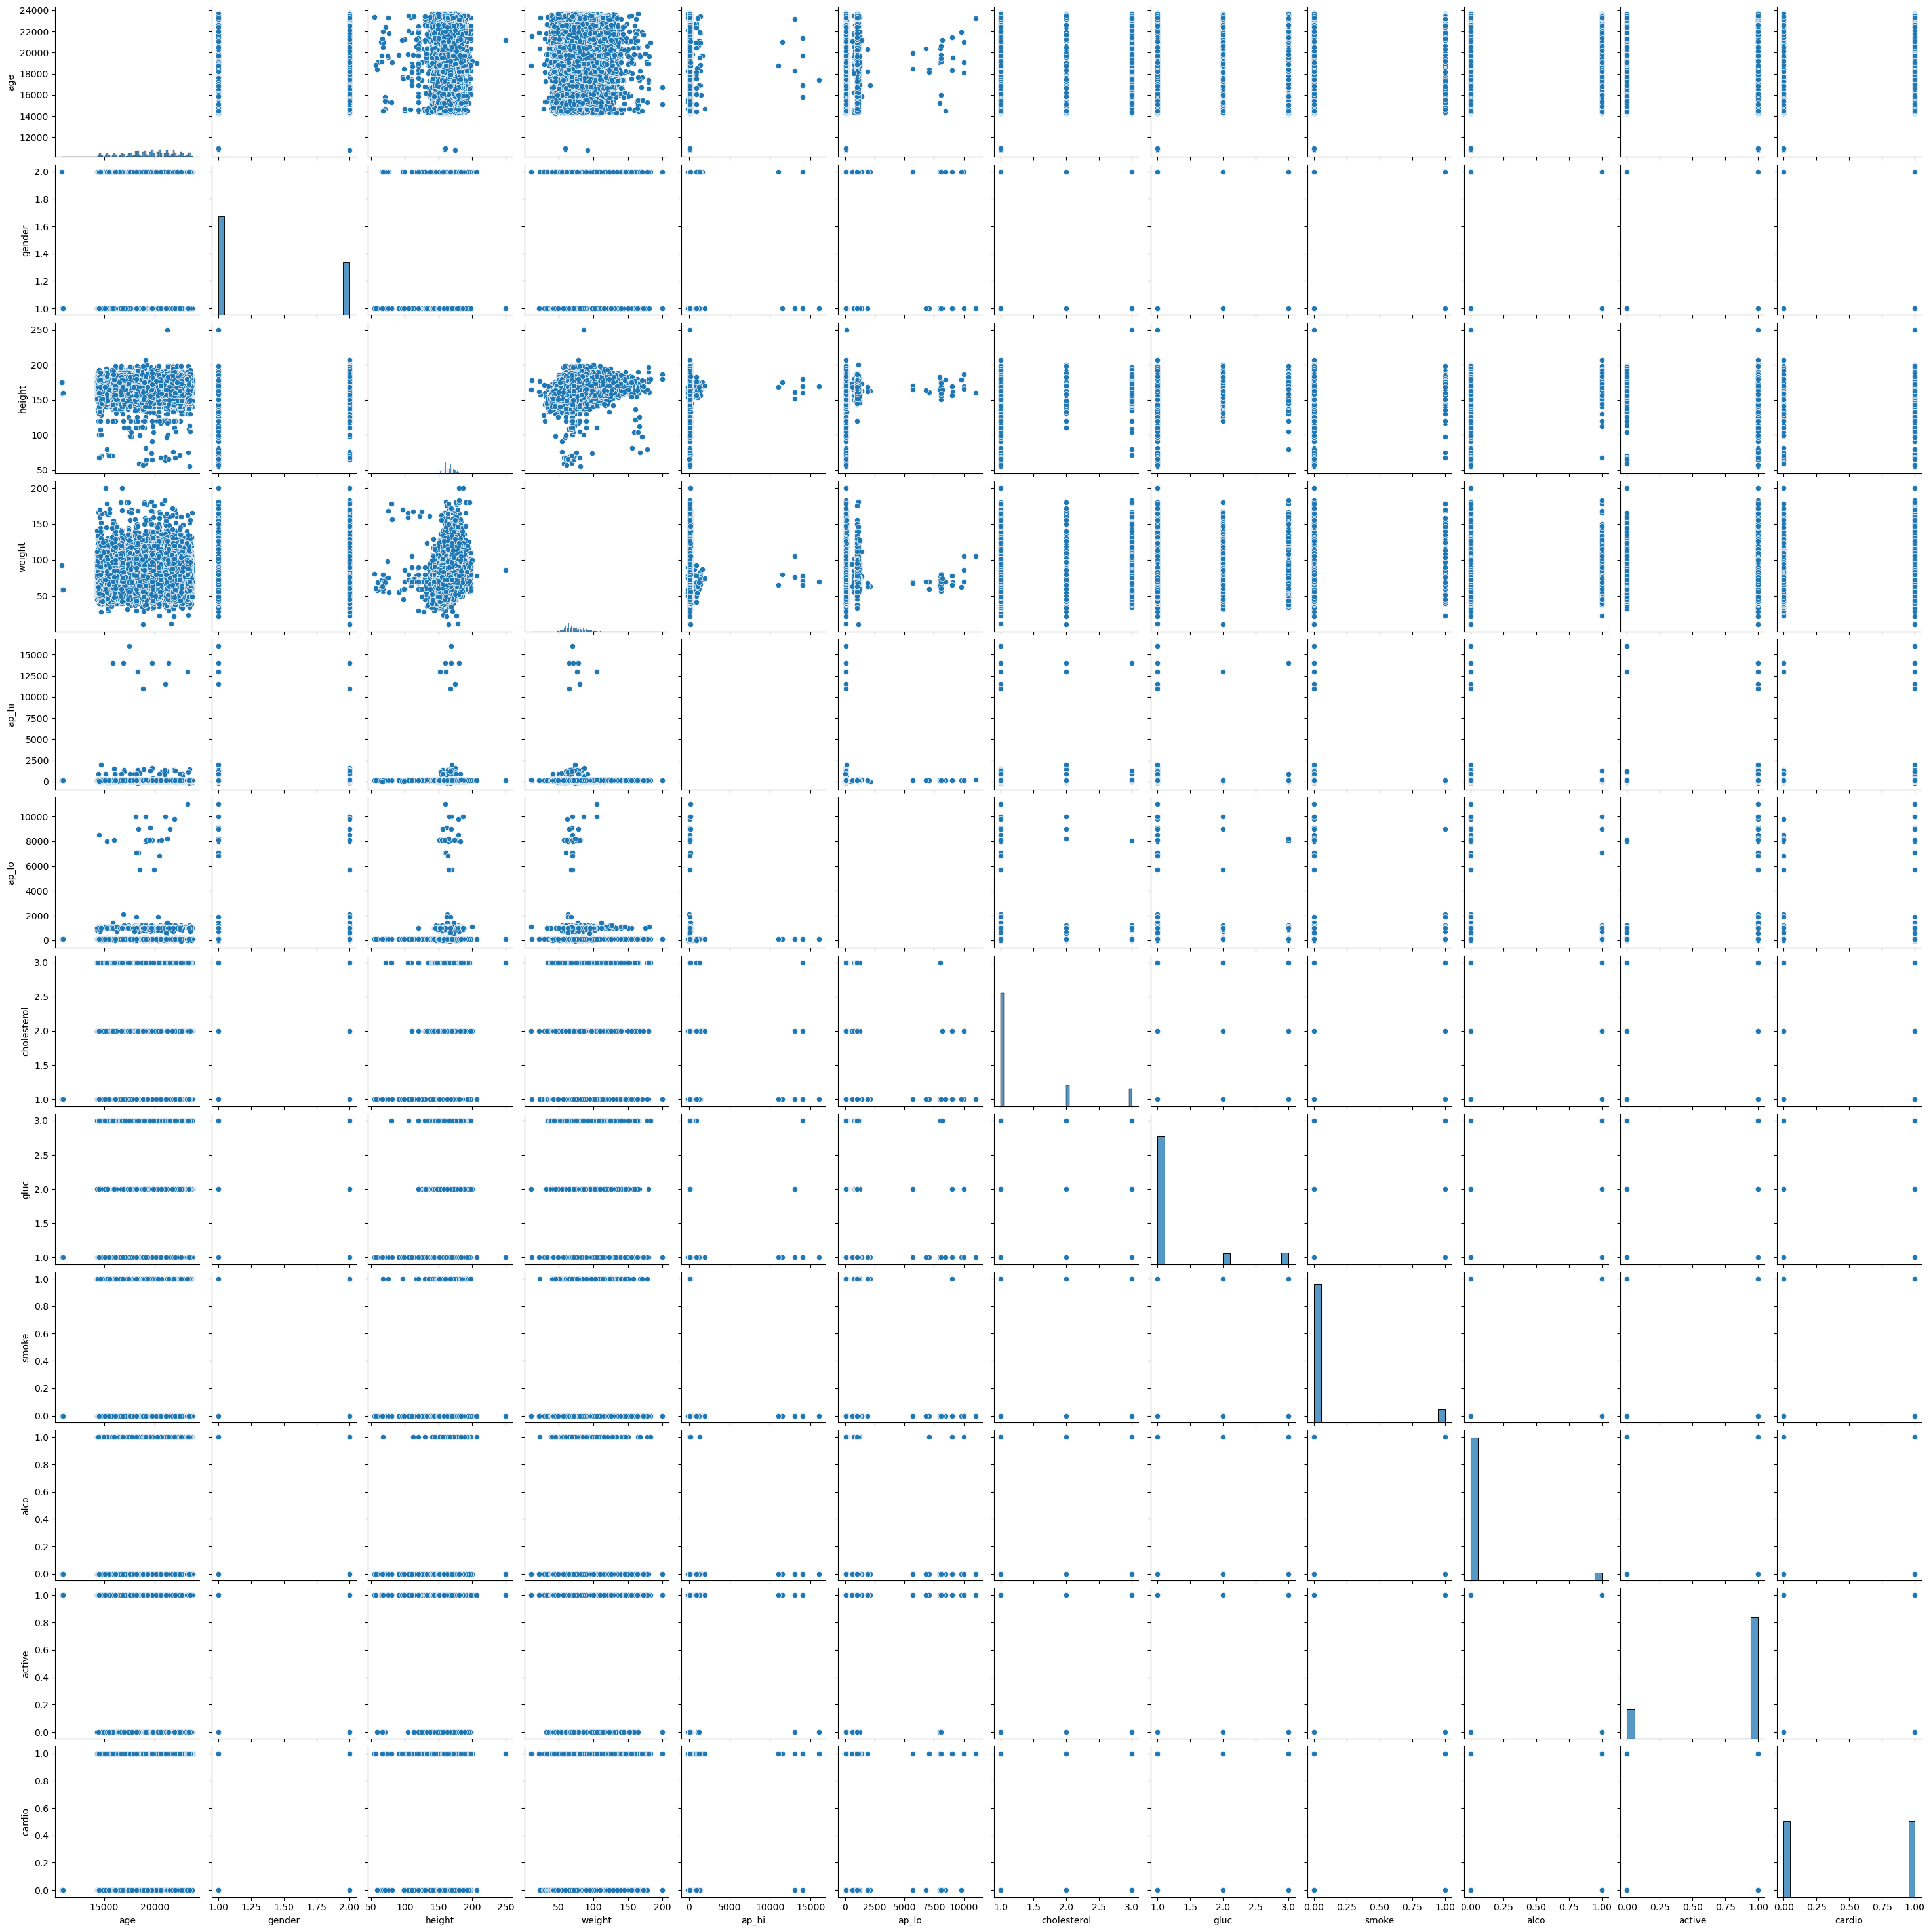

In [13]:
sns.pairplot(train.drop(['id'],axis=1))

Мультиколлинеарности не выявлено. Исследуем выбросы в данных.

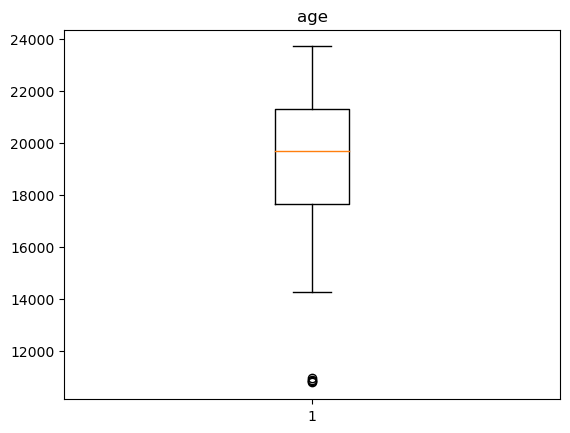

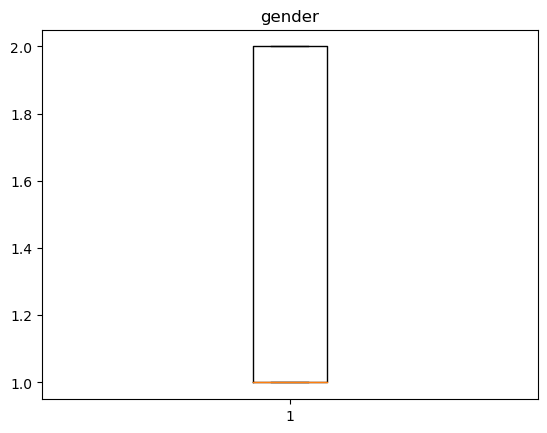

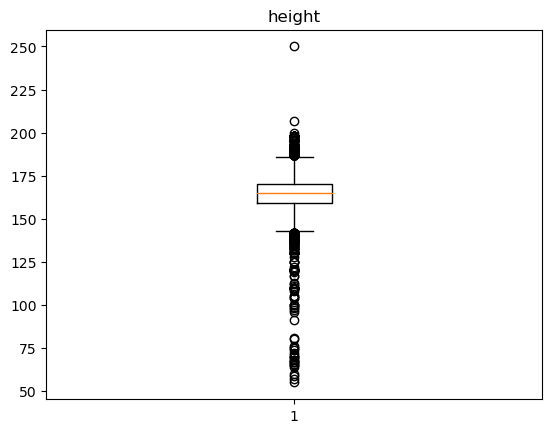

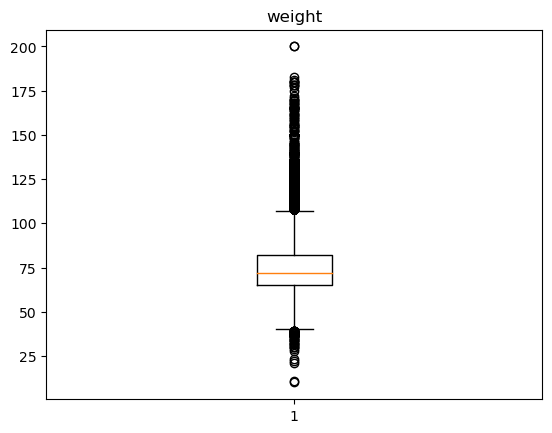

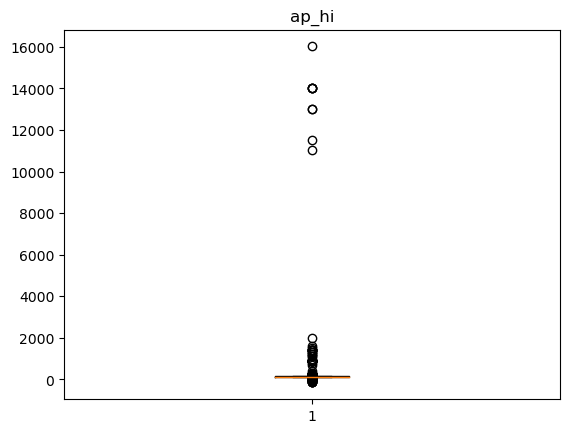

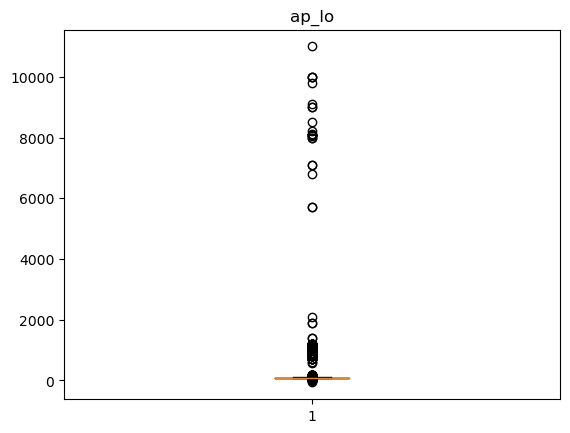

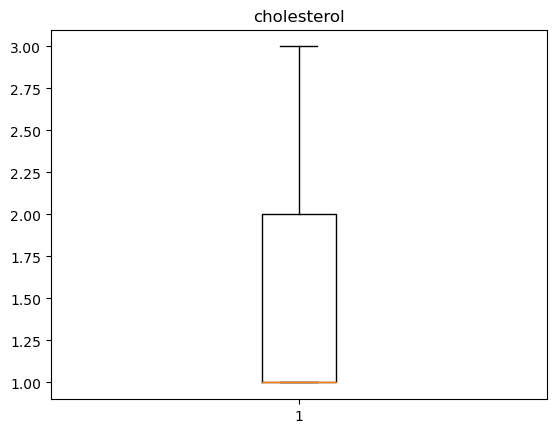

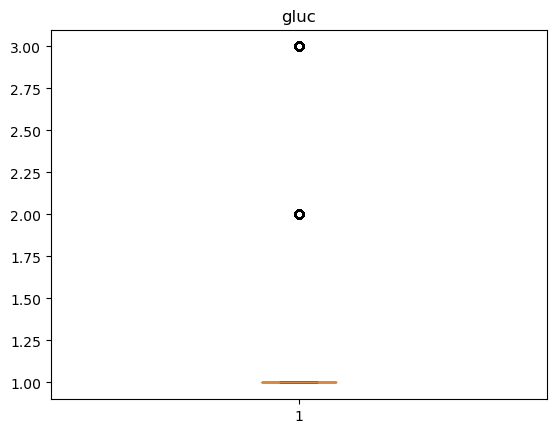

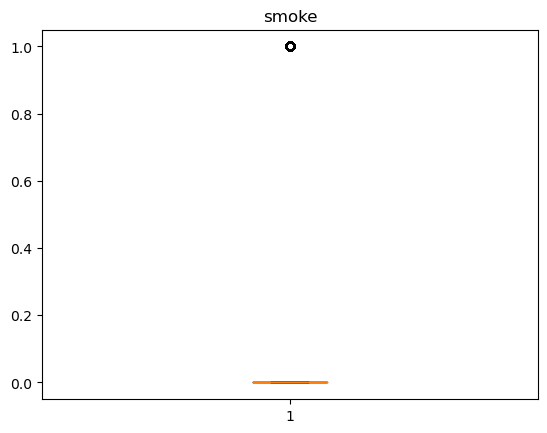

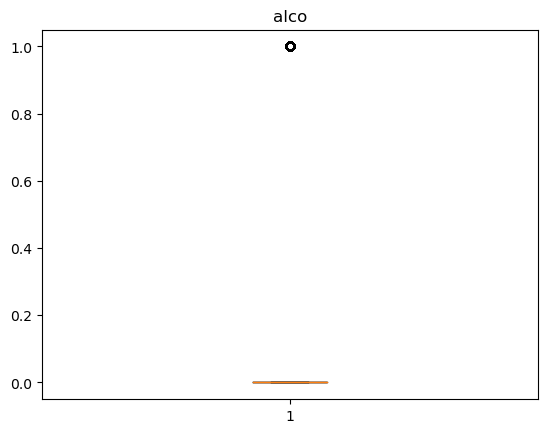

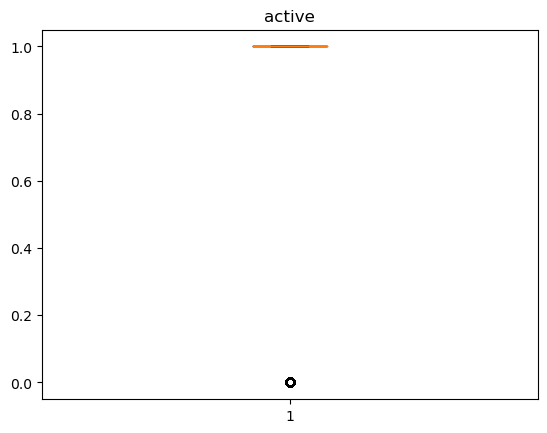

In [14]:
param = list(train.drop(['id','cardio'],axis=1).columns)

for i in range(len(param)):
    
    plt.boxplot(data=train, x=param[i])
    plt.title(param[i])
    plt.show()

   

В фичах возраста, веса, роста, максимального и минимального давлений выявлены выбросы. Проанализируем их подробнее.

In [15]:
train_prev = train
test_prev = test

In [16]:
#в возрасте присутсвует выброс для людей менее 39 лет. Большая часть выборки сосредоточена с возраста 39 до 64 лет. 
print((train['age']/365).sort_values().head(10))

#в росте присутствуют выбросы максимального роста и минимального
print('количество предельных значений роста',train[train['height']>198]['height'].count())

print('количество минимальных значений роста',train[train['height']<140]['height'].count())

#в весе присутствуют выбросы

print('количество предельных значений веса',train[train['weight']>110]['weight'].count())

print('количество минимальных значений веса',train[train['weight']<40]['weight'].count())

#в максимальном давлении присутствуют выбросы

print('количество предельных значений максимального давления',train[train['ap_hi']>200]['ap_hi'].count())

print('количество минимальных значений максимального давления',train[train['ap_hi']<60]['ap_hi'].count())


#в минимальном давлении присутствуют выбросы

print('количество предельных значений минимального давления',train[train['ap_lo']>200]['ap_lo'].count())

print('количество минимальных значений минимального давления',train[train['ap_lo']<60]['ap_lo'].count())

#проанализируем есть ли записи, где максимальное давление меньше минимального

print('неадекватные значения давления',train[train['ap_hi'] < train['ap_lo']]['ap_hi'].count())

22343    29.583562
30666    29.750685
6219     29.802740
55905    30.038356
31762    39.109589
23691    39.115068
38594    39.128767
45694    39.134247
53806    39.142466
54690    39.153425
Name: age, dtype: float64
количество предельных значений роста 3
количество минимальных значений роста 152
количество предельных значений веса 1247
количество минимальных значений веса 52
количество предельных значений максимального давления 100
количество минимальных значений максимального давления 188
количество предельных значений минимального давления 953
количество минимальных значений минимального давления 175
неадекватные значения давления 1234


In [17]:
#предположим что данные значения ошибочные - умножим их на -1
train.loc[train['ap_hi']<0,['ap_hi']] = train[train['ap_hi']<0]['ap_hi']*(-1)
train.loc[train['ap_lo']<0,['ap_lo']] = train[train['ap_lo']<0]['ap_lo']*(-1)
test.loc[test['ap_hi']<0,['ap_hi']] = test[test['ap_hi']<0]['ap_hi']*(-1)
test.loc[test['ap_lo']<0,['ap_lo']] = test[test['ap_lo']<0]['ap_lo']*(-1)

In [18]:
#скорректируем последовательно показатели давления: делим выбросы на 10
train.loc[train['ap_hi']>=1000,['ap_hi']] = train[train['ap_hi']>=1000]['ap_hi']/10
test.loc[test['ap_hi']>=1000,['ap_hi']] = test[test['ap_hi']>=1000]['ap_hi']/10
train.loc[train['ap_hi']>240,['ap_hi']] = train[train['ap_hi']>240]['ap_hi']/10
test.loc[test['ap_hi']>240,['ap_hi']] = test[test['ap_hi']>240]['ap_hi']/10

train.loc[train['ap_lo']>=1000,['ap_lo']] = train[train['ap_lo']>=1000]['ap_lo']/10
test.loc[test['ap_lo']>=1000,['ap_lo']] = test[test['ap_lo']>=1000]['ap_lo']/10
train.loc[train['ap_lo']>240,['ap_lo']] = train[train['ap_lo']>240]['ap_lo']/10
test.loc[test['ap_lo']>240,['ap_lo']] = test[test['ap_lo']>240]['ap_lo']/10

train.loc[train['ap_hi']<=24,['ap_hi']] = train[train['ap_hi']<=24]['ap_hi']*10
train.loc[train['ap_lo']<=24,['ap_lo']] = train[train['ap_lo']<=24]['ap_lo']*10

test.loc[test['ap_hi']<=24,['ap_hi']] = test[test['ap_hi']<=24]['ap_hi']*10
test.loc[test['ap_lo']<=24,['ap_lo']] = test[test['ap_lo']<=24]['ap_lo']*10

In [19]:
#корректируем показатели возраста, давления (трейн)
train['age'] = (train['age']/365)
train['ap_hi_test'] = train['ap_hi']
train.loc[train['ap_hi'] < train['ap_lo'],'ap_hi'] = train[train['ap_hi'] < train['ap_lo']]['ap_lo']
train.loc[train['ap_hi'] == train['ap_lo'],'ap_lo'] = train[train['ap_hi'] == train['ap_lo']]['ap_hi_test']
train = train.drop('ap_hi_test', axis = 1)
print(train[train['ap_hi'] < train['ap_lo']]['ap_hi'])

Series([], Name: ap_hi, dtype: float64)


In [20]:
#произведем корректировку признаков теста
test['age'] = (test['age']/365)
test['ap_hi_test'] = test['ap_hi']
test.loc[test['ap_hi'] < test['ap_lo'],'ap_hi'] = test[test['ap_hi'] < test['ap_lo']]['ap_lo']
test.loc[test['ap_hi'] == test['ap_lo'],'ap_lo'] = test[test['ap_hi'] == test['ap_lo']]['ap_hi_test']
test = test.drop('ap_hi_test', axis = 1)
print(test[test['ap_hi'] < test['ap_lo']]['ap_hi'])

Series([], Name: ap_hi, dtype: float64)


In [21]:
max_height = 198
median_height_1 = train[(train['height']>=140) & (train['height']<=198)&(train['gender'] == 1)]['height'].median()

median_weight_1 = train[(train['weight']<=110) & (train['weight']>=40)&(train['gender'] == 1)]['weight'].median()

median_height_2 = train[(train['height']>=140) & (train['height']<=198)&(train['gender'] == 2)]['height'].median()

median_weight_2 = train[(train['weight']<=110) & (train['weight']>=40)&(train['gender'] == 2)]['weight'].median()



median_ap_hi = train[ (train['ap_hi']<=200) & (train['ap_hi']>=60) ]['ap_hi'].median()

median_ap_lo = train[ (train['ap_lo']<=200) & (train['ap_lo']>=60) ]['ap_lo'].median()

In [22]:
#произведем вторичную корректировку признаков трейна

train.loc[train['height']>198, 'height'] = max_height
train.loc[(train['height']<140)&(train['gender'] == 1), 'height'] = median_height_1
train.loc[(train['height']<140)&(train['gender'] == 2), 'height'] = median_height_2
train.loc[(train['weight']>110)&(train['gender'] == 1), 'weight'] = median_weight_1
train.loc[(train['weight']<40)&(train['gender'] == 2), 'weight'] = median_weight_2

train.loc[train['ap_hi']>200, 'ap_hi'] = median_ap_hi
train.loc[train['ap_hi']<60, 'ap_hi'] = median_ap_hi

train.loc[train['ap_lo']>200, 'ap_lo'] = median_ap_lo
train.loc[train['ap_lo']<60, 'ap_lo'] = median_ap_lo

In [23]:
#произведем вторичную корректировку признаков теста

test.loc[test['height']>198, 'height'] = max_height
test.loc[(test['height']<140)&(test['gender'] == 1), 'height'] = median_height_1
test.loc[(test['height']<140)&(test['gender'] == 2), 'height'] = median_height_2
test.loc[(test['weight']>110)&(test['gender'] == 1), 'weight'] = median_weight_1
test.loc[(test['weight']<40)&(test['gender'] == 2), 'weight'] = median_weight_2

test.loc[test['ap_hi']>200, 'ap_hi'] = median_ap_hi
test.loc[test['ap_hi']<60, 'ap_hi'] = median_ap_hi

test.loc[test['ap_lo']>200, 'ap_lo'] = median_ap_lo
test.loc[test['ap_lo']<60, 'ap_lo'] = median_ap_lo

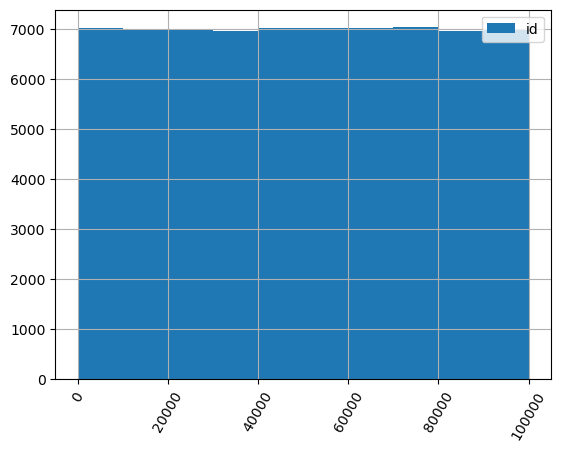

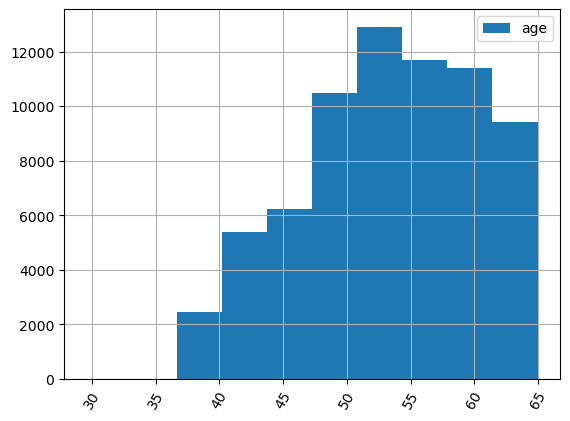

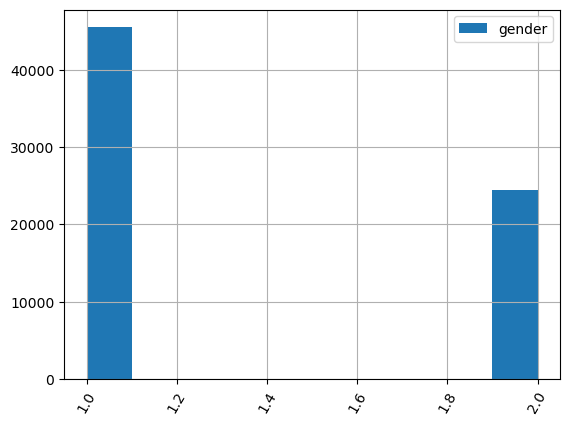

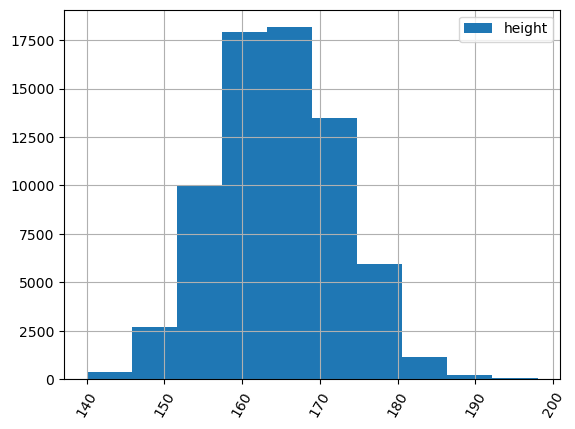

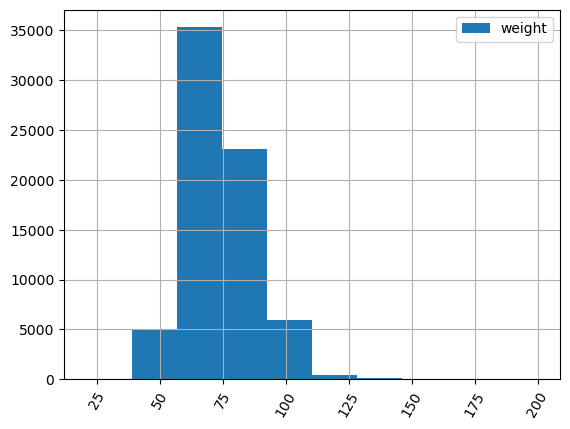

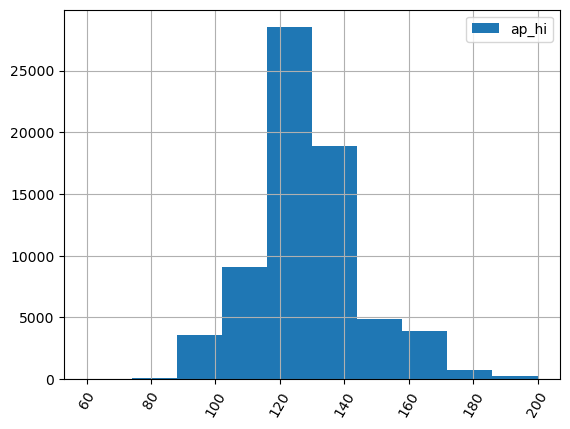

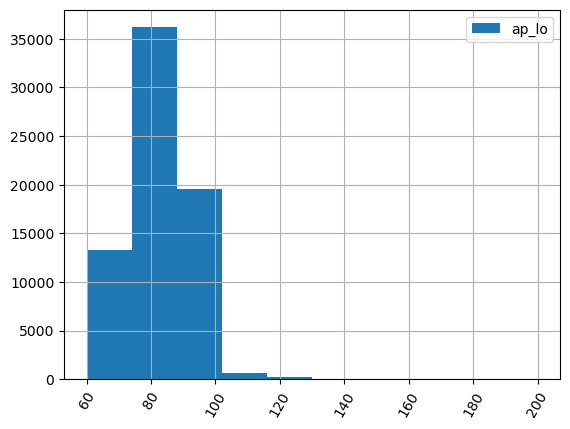

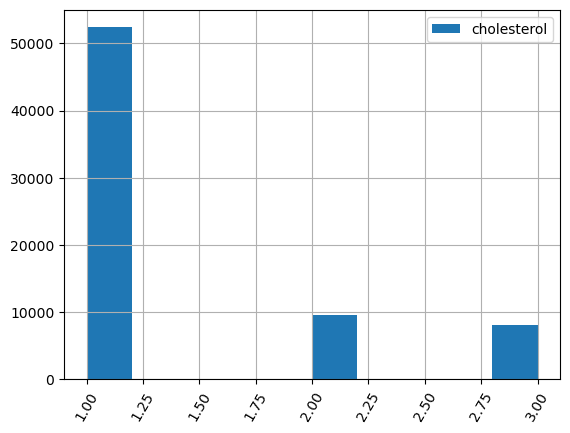

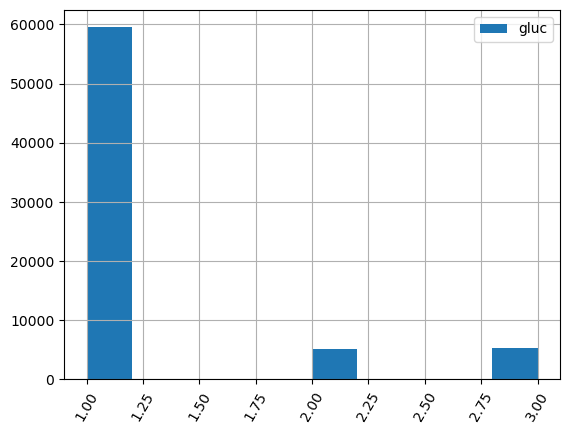

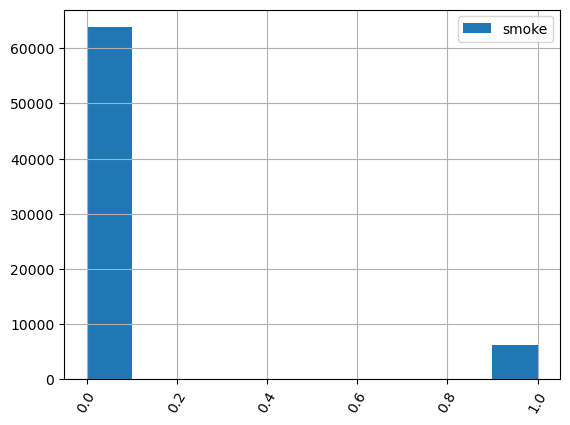

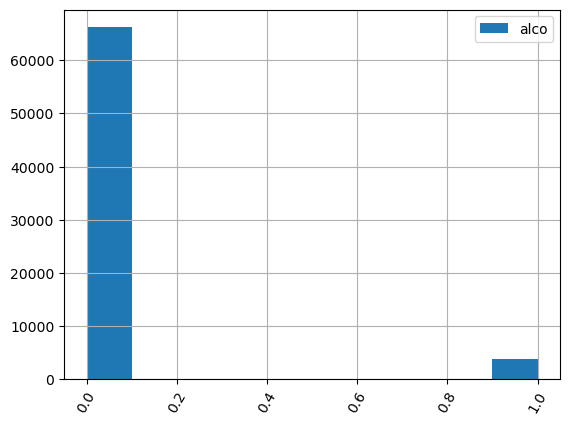

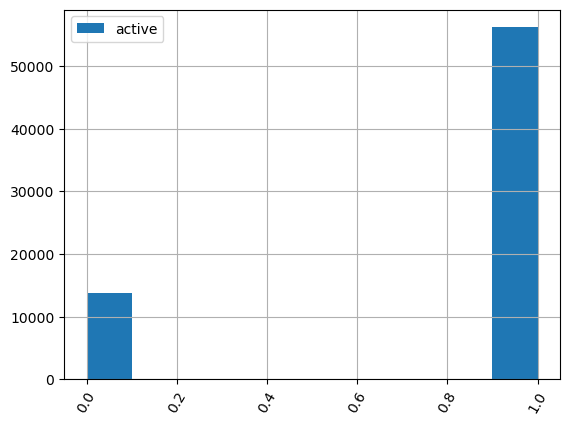

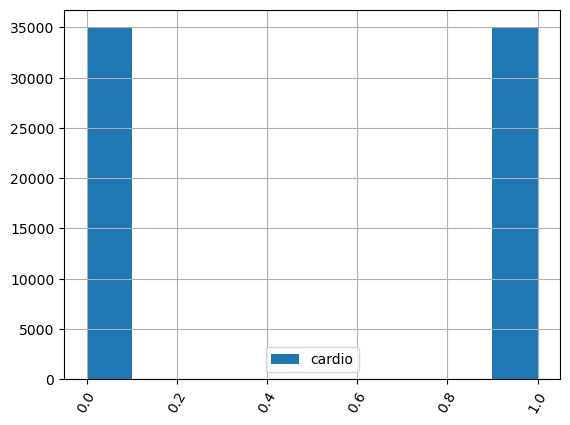

In [24]:
param = list(train.columns)

for i in range(len(param)):
    train[param[i]].hist(xrot=60,legend = True) 
    plt.show()
   

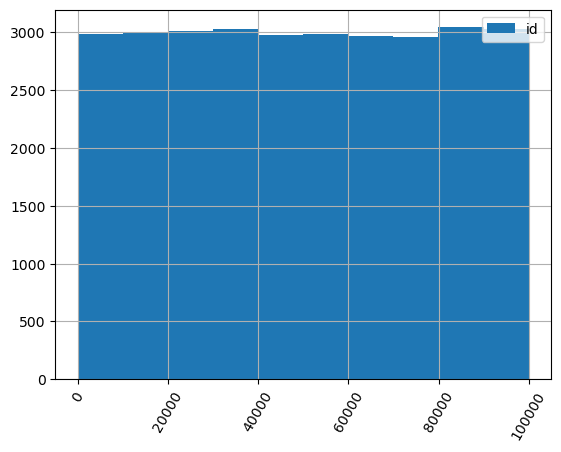

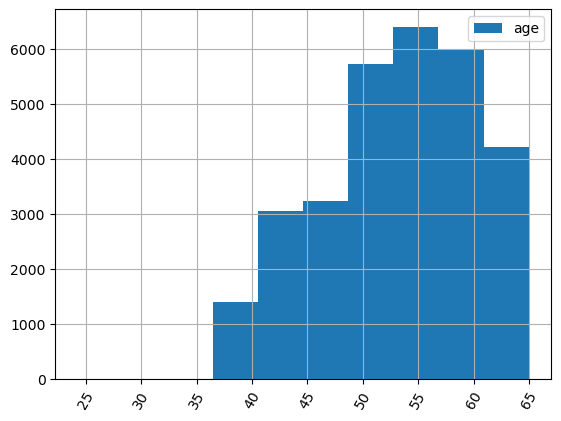

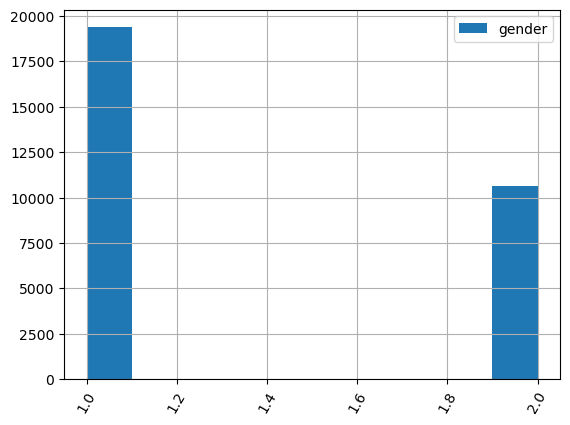

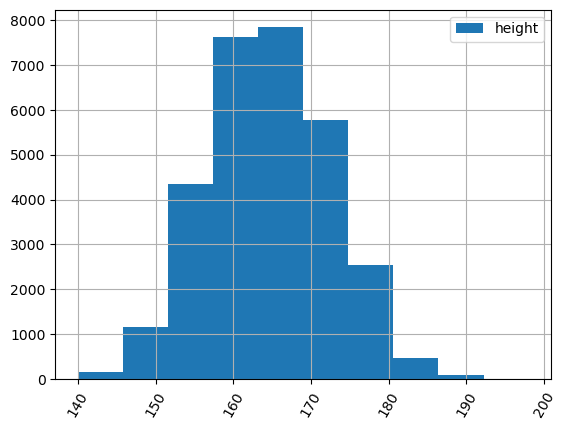

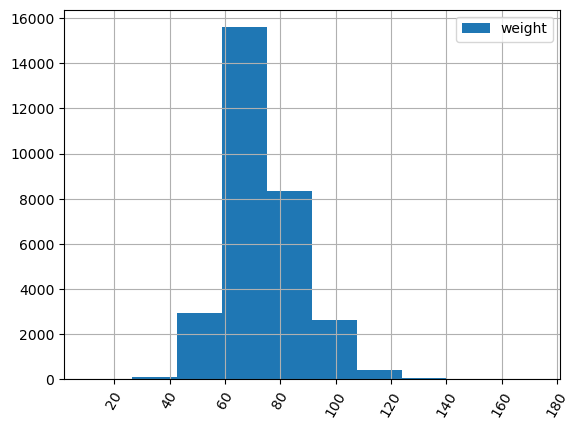

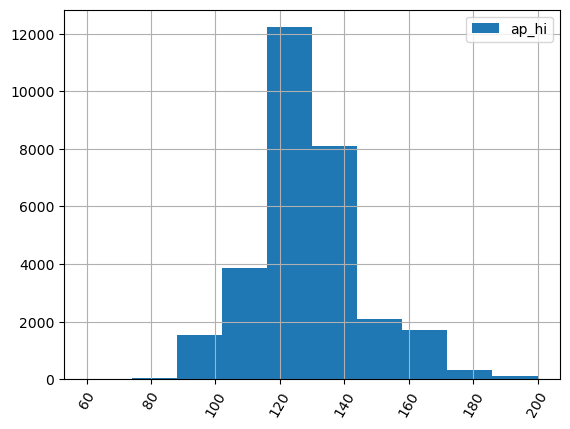

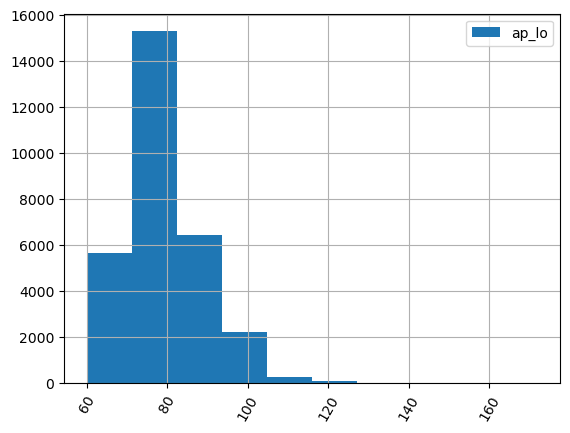

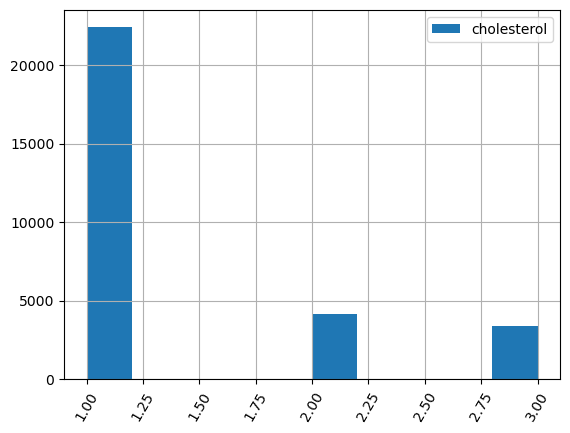

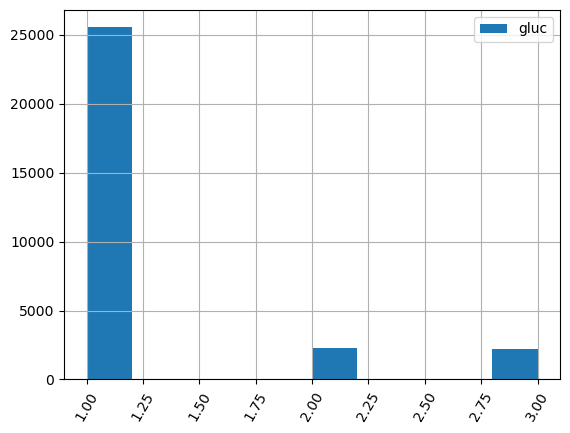

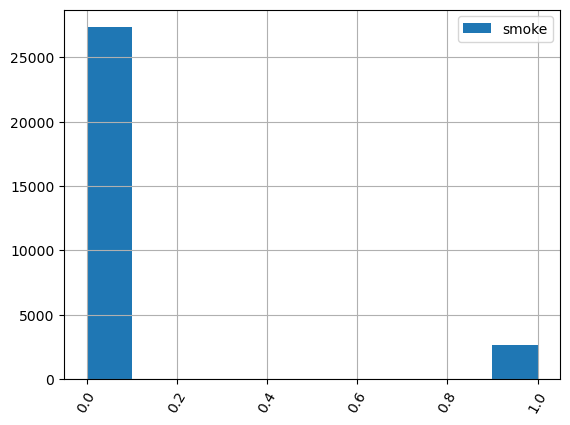

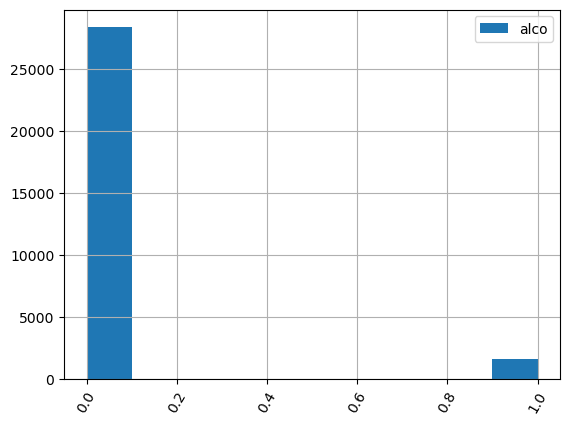

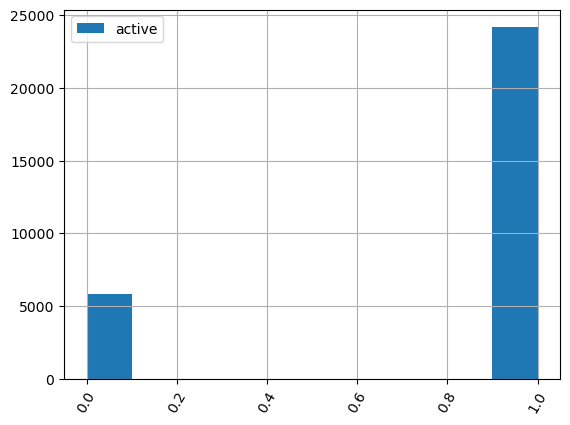

In [25]:
param = list(test.columns)

for i in range(len(param)):
    test[param[i]].hist(xrot=60,legend = True) 
    plt.show()
   

Распределения фич в двух датасетах совпадают. Целевой признак - взвешен. Категориальные признаки, которые требуют кодирование, отсутствуют. Необходимо масштабировать признаки. Также дополнительно создадим новую фичу - индекс массы тела, после чего уберем признаки веса и роста.

In [26]:
#дополнительно рассчитаем индекс массы тела и уберем коррелирующие признаки (вес и рост)

train['IMT'] = train['weight']/(train['height'] **2)
train = train.drop(['weight','height'],axis=1)

display(train)


#дополнительно рассчитаем индекс массы тела и уберем коррелирующие признаки (вес и рост)

test['IMT'] = test['weight']/(test['height'] **2)
test = test.drop(['weight','height'],axis=1)

display(test)



,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMT
0,0,50.391781,2,110.0,80.0,1,1,0,0,1,0,0.002197
1,1,55.419178,1,140.0,90.0,3,1,0,0,1,1,0.003493
2,2,51.663014,1,130.0,70.0,3,1,0,0,0,1,0.002351
3,3,48.282192,2,150.0,100.0,1,1,0,0,1,1,0.002871
4,4,47.873973,1,100.0,60.0,1,1,0,0,0,0,0.002301
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,120.0,80.0,1,1,1,0,1,0,0.002693
69996,99995,61.920548,1,140.0,90.0,2,2,0,0,1,1,0.002804
69997,99996,52.235616,2,180.0,90.0,3,1,0,1,0,1,0.003135
69998,99998,61.454795,1,135.0,80.0,1,2,0,0,0,1,0.002710


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,IMT
0,5,51.747945,1,130.0,80.0,1,1,0,0,1,0.003584
1,6,52.169863,2,130.0,90.0,1,1,0,0,1,0.002388
2,7,55.978082,1,120.0,75.0,1,1,0,0,0,0.002734
3,10,49.679452,2,130.0,90.0,1,1,0,0,1,0.002747
4,11,44.090411,2,120.0,80.0,1,1,0,0,1,0.002630
...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,59.512329,2,150.0,90.0,1,1,0,1,0,0.003564
29996,99987,50.161644,1,110.0,70.0,1,1,0,0,1,0.002637
29997,99989,58.210959,2,120.0,80.0,1,1,0,0,0,0.002136
29998,99994,39.750685,2,120.0,80.0,2,1,0,0,0,0.002612


Первоначальная обработка завершена. Создана новая фича, скорректированы выбросы и ряд некорректных признаков. Приступаем к масштабированию признаков и валидации моделей.

### Формирование первоначальных метрик ML model

In [27]:
X_train = train.drop(['id','cardio'],axis=1)
Y_train = train['cardio']

X_test = train.drop(['id'],axis=1)

In [28]:
RANDOM_STATE = 12345
CV = 6

In [29]:
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

X_train = X_train_scaled


In [30]:
model = RandomForestClassifier(random_state = RANDOM_STATE, class_weight='balanced')
model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=12345)

In [31]:
feature_names = [column for column in X_train]
feature_importances = model.feature_importances_
forest_importances = pd.DataFrame(feature_importances, index=feature_names)
forest_importances.sort_values(by = 0)

,0
alco,0.006933
smoke,0.008064
active,0.011286
gender,0.013972
gluc,0.015623
cholesterol,0.037511
ap_lo,0.088081
ap_hi,0.169812
IMT,0.297507
age,0.351210


Наиболее важными признаками являются две фичи, которые были сгенерированы (индекс массы тела и возраст).
Менее - давление, холестерин.

In [32]:
#оценим путем кросс_валидации по лучшим признакам наибольшую метрику трех моделей

model = DecisionTreeClassifier(random_state=RANDOM_STATE,class_weight='balanced')

parametrs = { 'max_depth': range (2,16, 2),
              'min_samples_leaf': range (2,10, 2) }
grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
grid.fit(X_train, Y_train)

grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 8}

In [33]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE,class_weight='balanced',max_depth = 6, min_samples_leaf = 4)

scores = cross_val_score(model,X_train,Y_train, cv=CV,scoring = 'roc_auc')

print('Оценки качества модели:', scores)

print('Средняя оценка качества модели:', sum(scores)/len(scores))

Оценки качества модели: [0.79256391 0.79417158 0.79798253 0.79614959 0.79919663 0.7899522 ]
Средняя оценка качества модели: 0.7950027384504862


In [34]:
model = LogisticRegression(random_state=RANDOM_STATE,solver='liblinear',class_weight='balanced', max_iter = 1000)

scores = cross_val_score(model,X_train,Y_train, cv=CV,scoring = 'roc_auc')

print('Оценки качества модели:', scores)


print('Средняя оценка качества модели:', sum(scores)/len(scores))

Оценки качества модели: [0.78962636 0.79250987 0.7945068  0.7953953  0.79740466 0.78854728]
Средняя оценка качества модели: 0.7929983788756854


In [35]:
model = RandomForestClassifier(random_state=12345,class_weight='balanced')

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (2,10, 2) }
grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
grid.fit(X_train, Y_train)

grid.best_params_

{'max_depth': 8, 'n_estimators': 50}

In [36]:
model = RandomForestClassifier(random_state=RANDOM_STATE,class_weight='balanced',max_depth= 8, n_estimators=50)

scores = cross_val_score(model,X_train,Y_train, cv=CV,scoring = 'roc_auc')

print('Оценки качества модели:', scores)


print('Средняя оценка качества модели:', sum(scores)/len(scores))

Оценки качества модели: [0.80023106 0.79971039 0.80399962 0.80204631 0.80548822 0.79646676]
Средняя оценка качества модели: 0.8013237282753504


Далее работаем с моделью RandomForestClassifier - модель с лучшей метрикой по roc_auc. Однако дополнительно используем метод град. бустинга.

### Формирование финальной модели ML

In [37]:
X = train.drop(['id','cardio'],axis=1)
Y = train['cardio']


X_test = test.drop(['id'],axis=1)


In [38]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
                                                                X,Y, 
                                                                train_size=0.70, 
                                                                random_state = RANDOM_STATE)

print('Количество объектов внутри обучающей выборки',X_train['age'].count())
print('Количество объектов внутри валидационной выборки',X_valid['age'].count())


Количество объектов внутри обучающей выборки 49000
Количество объектов внутри валидационной выборки 21000


In [39]:
#масштабируем признаки
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)


X_train = X_train_scaled
X_test = X_test_scaled
X_valid = X_valid_scaled


In [40]:
model = RandomForestClassifier(random_state=12345,class_weight='balanced')

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (2,10, 2) }
grid = GridSearchCV(model, parametrs, scoring = 'roc_auc')
grid.fit(X_train, Y_train)

grid.best_params_

{'max_depth': 8, 'n_estimators': 50}

In [41]:
model_forest = RandomForestClassifier(random_state=12345,class_weight='balanced',n_estimators = 50,max_depth = 8 )
model_forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=50,
                       random_state=12345)

In [42]:
prediction = model_forest.predict(X_valid)
probabilities = model_forest.predict_proba(X_valid)
probabilities_one = probabilities[:, 1]


print('Оценка параметров случайного леса')
print(f1_score(Y_valid,prediction))
print(roc_auc_score(Y_valid,probabilities_one))



Оценка параметров случайного леса
0.714505067048828
0.8010666251850347


In [43]:
model_boost = GradientBoostingClassifier(random_state = RANDOM_STATE, n_estimators=100,criterion='squared_error')
model_boost.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='squared_error', random_state=12345)

In [44]:
prediction = model_boost.predict(X_valid)
probabilities = model_boost.predict_proba(X_valid)
probabilities_one = probabilities[:, 1]


print('Оценка параметров градиентного бустинга_S_Er')
print(f1_score(Y_valid,prediction))
print(roc_auc_score(Y_valid,probabilities_one))



Оценка параметров градиентного бустинга_S_Er
0.7250174354886918
0.8018497799538502


In [45]:
model_boost = GradientBoostingClassifier(random_state = RANDOM_STATE, n_estimators=100,criterion='friedman_mse')
model_boost.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=12345)

In [46]:
prediction = model_boost.predict(X_valid)
probabilities = model_boost.predict_proba(X_valid)
probabilities_one = probabilities[:, 1]


print('Оценка параметров градиентного бустинга_F_MSE')
print(f1_score(Y_valid,prediction))
print(roc_auc_score(Y_valid,probabilities_one))


Оценка параметров градиентного бустинга_F_MSE
0.7250174354886918
0.8018543060473687


In [47]:
model_cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.10,
    random_state = RANDOM_STATE,
    custom_loss='AUC'
)


model_cat.fit(X_train, Y_train,
         eval_set=(X_valid, Y_valid),
         verbose=False)

In [48]:
prediction = model_cat.predict(X_valid)
probabilities = model_cat.predict_proba(X_valid)
probabilities_one = probabilities[:, 1]


print('Оценка параметров градиентного бустинга_catboost')
print(f1_score(Y_valid,prediction))
print(roc_auc_score(Y_valid,probabilities_one))


Оценка параметров градиентного бустинга_catboost
0.726548496315475
0.8038202043363423


Наилучшая метрика с учетом всех доработок - град. бустинг на catboost. Остановимся на данной модели. Сформируем предикты по тесту и сохраним модель.

In [49]:
prediction = model_cat.predict(X_test)
probabilities = model_cat.predict_proba(X_test)
probabilities_one = probabilities[:, 1]

In [62]:
feature_names = [column for column in X_train]
feature_importances = model_cat.get_feature_importance()
cat_importances = pd.DataFrame(feature_importances, index=feature_names)
cat_importances.sort_values(by = 0)


,0
alco,1.520588
smoke,1.843348
gender,2.021646
active,3.011930
gluc,4.169146
ap_lo,7.410852
IMT,8.716044
cholesterol,12.821823
age,22.914074
ap_hi,35.570548


Важность фич уже в градиентом бустинге отличается от показателей в случайном лесе. Теперь наиболее важные фичи - максимальное давление, возраст, холестерин, индекс массы тела. При этом связь между данными показателями и целевым признаком - прямая, следовательно, при росте вероятности - необходимо особенно следить за перечисленными выше признаки и постараться их снизить.

In [50]:
#Сохраняем модель град.б на catboost
from pickle import dump,load

In [51]:
#dump(model_cat,open('final_cv_predict_model.pcl','wb'))